In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_df_2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2895 non-null   int64  
 1   MSZoning       2895 non-null   object 
 2   LotFrontage    2895 non-null   float64
 3   LotArea        2895 non-null   int64  
 4   Street         2895 non-null   object 
 5   LotShape       2895 non-null   object 
 6   LandContour    2895 non-null   object 
 7   Utilities      2895 non-null   object 
 8   LotConfig      2895 non-null   object 
 9   LandSlope      2895 non-null   object 
 10  Neighborhood   2895 non-null   object 
 11  Condition1     2895 non-null   object 
 12  Condition2     2895 non-null   object 
 13  BldgType       2895 non-null   object 
 14  HouseStyle     2895 non-null   object 
 15  OverallQual    2895 non-null   int64  
 16  OverallCond    2895 non-null   int64  
 17  YearBuilt      2895 non-null   int64  
 18  YearRemo

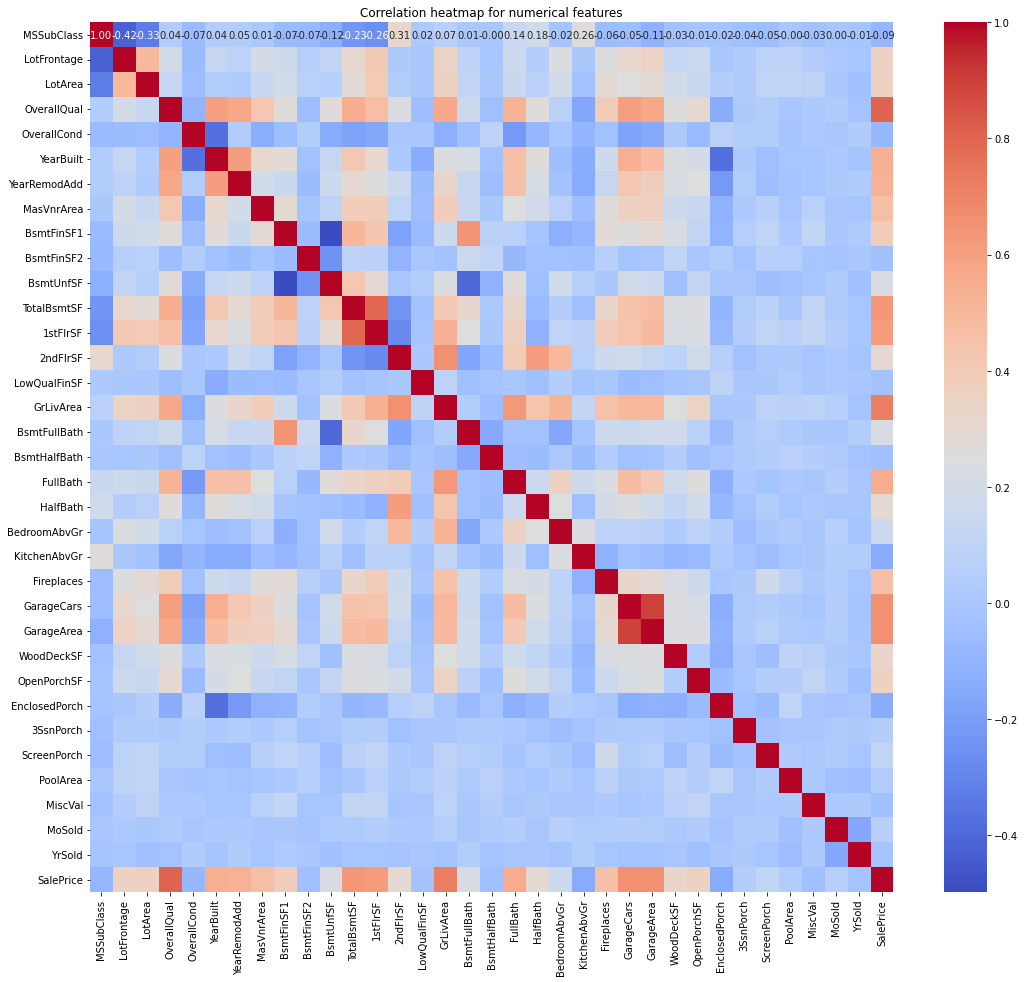

In [4]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation heatmap for numerical features');

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Data to be predicted
df_to_predict = df[df['SalePrice'].isnull()]
df_to_predict = df_to_predict.drop(['SalePrice'], axis = 1)

In [7]:
df = df.dropna()

In [8]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
import catboost

In [12]:
from catboost import CatBoostRegressor

In [13]:
model = catboost.CatBoostRegressor(
    logging_level='Silent',
    iterations=2000,
    l2_leaf_reg=2,
    learning_rate= 0.03,
    depth = 5,
    random_seed = 42,
    eval_metric='RMSE',
    od_pval = 0,
    od_type='Iter', 
    od_wait=10)

In [14]:
model.fit(X_train, y_train)

In [15]:
pred = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
r2_score(y_test, pred)

0.9362358658290706

In [18]:
MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

In [19]:
MAE

12441.627351460284

In [20]:
RMSE

17743.555615768757

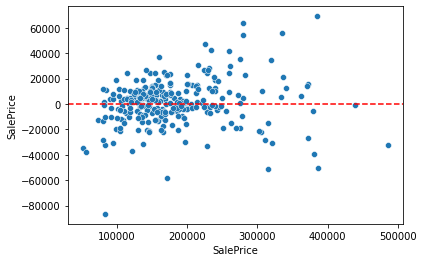

In [21]:
test_residuals = y_test - pred
sns.scatterplot(x=y, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

In [22]:
model.get_params()

{'iterations': 2000,
 'learning_rate': 0.03,
 'depth': 5,
 'l2_leaf_reg': 2,
 'loss_function': 'RMSE',
 'od_pval': 0,
 'od_wait': 10,
 'od_type': 'Iter',
 'random_seed': 42,
 'logging_level': 'Silent',
 'eval_metric': 'RMSE'}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
model = GradientBoostingRegressor()

In [27]:
param_grid = {'n_estimators': [50, 100, 150],
              'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
              'learning_rate': [.1, 1],
              'subsample': [.1, 1],
              'criterion': ['friedman_mse', 'squared_error'],
              'min_samples_split': [2, 10],
              'min_samples_leaf': [1, 10],
              'min_weight_fraction_leaf': [0, .5],
              'max_depth': [3, 5, 10],
              'max_features':[None, 'sqrt', 'log2'],
              'max_leaf_nodes': [None, 2, 10]
             }

In [28]:
grid = GridSearchCV(model,param_grid)

In [29]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_depth': [3, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 2, 10],
                         'min_samples_leaf': [1, 10],
                         'min_samples_split': [2, 10],
                         'min_weight_fraction_leaf': [0, 0.5],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.1, 1]})

In [30]:
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 150,
 'subsample': 1}

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
y_pred = grid.predict(X_test)

In [34]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [35]:
r2_score(y_test,y_pred)

0.8654320503521921

In [36]:
MAE

19204.968628219733

In [37]:
RMSE

25099.856291723674

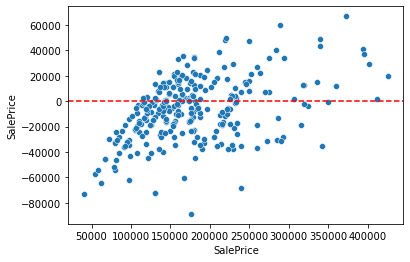

In [38]:
test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

In [39]:
grid.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__base_estimator': None,
 'estimator__learning_rate': 1.0,
 'estimator__loss': 'linear',
 'estimator__n_estimators': 50,
 'estimator__random_state': None,
 'estimator': AdaBoostRegressor(),
 'n_jobs': None,
 'param_grid': {'n_estimators': [50, 100, 120],
  'loss': ['linear', 'square', 'exponential'],
  'learning_rate': [0.1, 0.5, 1, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [23]:
final_model = model = catboost.CatBoostRegressor(
    logging_level='Silent',
    iterations=2000,
    l2_leaf_reg=2,
    learning_rate= 0.03,
    depth = 5,
    random_seed = 42,
    eval_metric='RMSE',
    od_pval = 0,
    od_type='Iter', 
    od_wait=10)

In [24]:
final_model.fit(X, y)

In [25]:
final_pred = final_model.predict(X)

In [26]:
r2_score(y, final_pred)

0.9938703625224327

In [27]:
final_model.score(X,y)

0.9938703625224327

In [28]:
MAE = mean_absolute_error(y,final_pred)
MSE = mean_squared_error(y,final_pred)
RMSE = np.sqrt(MSE)

In [29]:
MAE

4491.863505068087

In [30]:
RMSE

5845.448904262572

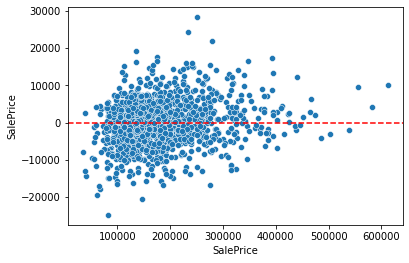

In [31]:
test_residuals = y - final_pred
sns.scatterplot(x=y, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

In [32]:
result = final_model.predict(df_to_predict)

In [33]:
test = pd.read_csv('test.csv')

In [34]:
submission = pd.DataFrame({'Id':test['Id'],'SalePrice':result})
submission['SalePrice'] = submission['SalePrice'].astype(int)
print(submission.shape)

(1459, 2)


In [35]:
submission['SalePrice']

0       129474
1       162893
2       190434
3       189586
4       179629
         ...  
1454     82666
1455     77355
1456    160375
1457    113449
1458    229385
Name: SalePrice, Length: 1459, dtype: int32

In [36]:
filename = 'house_preds.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: house_preds.csv
